In [136]:
######## printing this thing as a pdf###############
# in bash
#
# jupyter nbconvert --to HTML filename.ipynb
# wkhtmltopdf filename.html filename.pdf
#
#### for one page pdf #####
#
# wkhtmltopdf -T 0 -B 0 --page-width 210mm --page-height 2970mm input.html output.pdf
# 
# A normal page is 297mm long so just make it whatever multiple you need
#

# STK4900 Obligatory Assignment 1
## Bruce Chappell

For this assignment I will be using a Jupyter environment run on an R kernel. This will allow for easy plotting and manipulation. First I will import the data file that is locally downloaded from the class website.

In [94]:
#read data
setwd("/Users/douglas/2019_spring/STK4900/mando1")
no2data <- read.table("no2.txt",sep="\t",header=TRUE)

#### Question 1:
##### Part A:

We first want to get an overview of of the NO2 concentration and number of cars. These data points have all been transformed by log base 10. 


NO2 summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.224   3.214   3.848   3.698   4.217   6.395 


Cars summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.127   6.176   7.425   6.973   7.793   8.349 

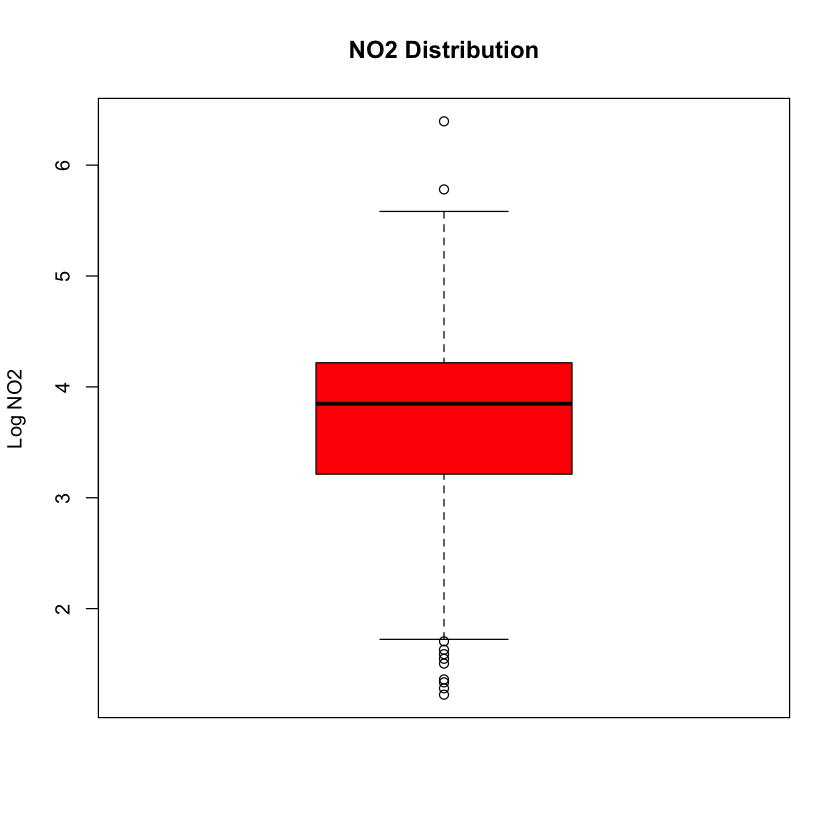

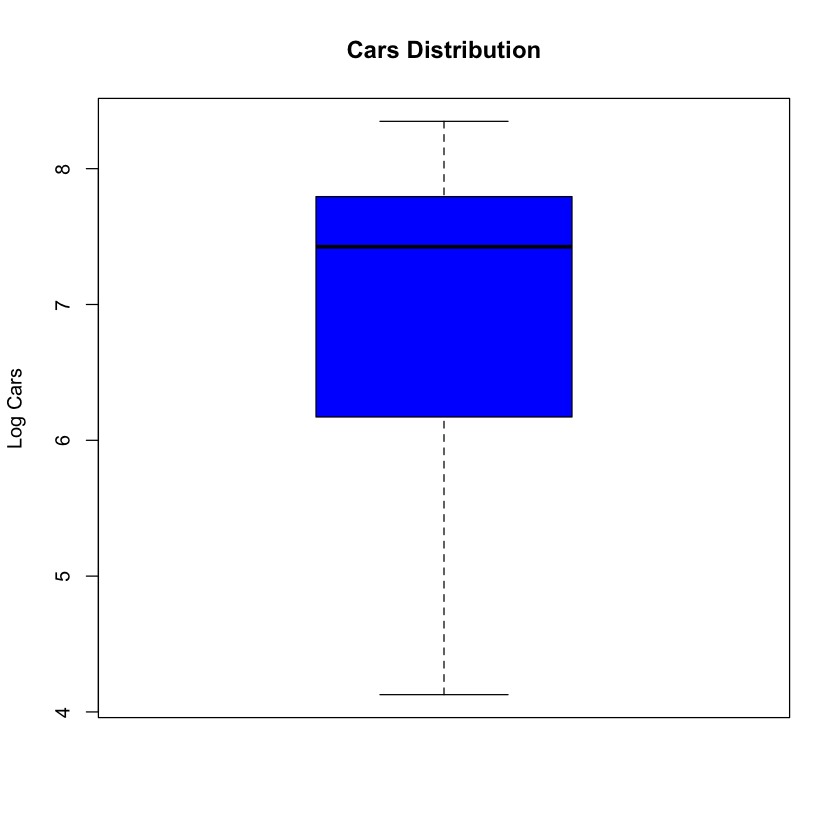

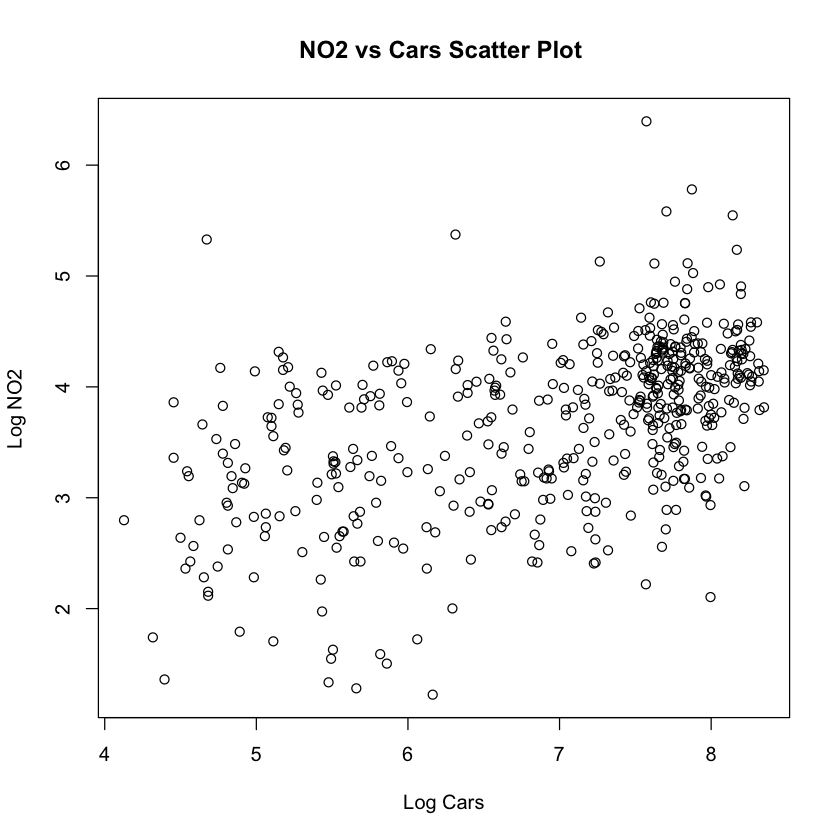

In [110]:
cat("NO2 summary")
summary(no2data$log.no2)
cat("\nCars summary")
summary(no2data$log.cars)

#boxplots
boxplot(no2data$log.no2, ylab = 'Log NO2', col = 'red')
title('NO2 Distribution')
boxplot(no2data$log.cars, ylab = 'Log Cars', col = 'blue')
title('Cars Distribution')

#scatter plot
plot(x = no2data[,"log.cars"], y = no2data[,"log.no2"], xlab = "Log Cars", ylab = "Log NO2", main = "NO2 vs Cars Scatter Plot ")

From the box plots above we see that Log(NO2) concentration has many outliers, especially on the lower end. Looking at the scatter plot, there appears to be a general linear relationship between number of cars and NO2 concentration. However, this is not an extremely obvious trend and for low values of Log(Cars) there is a seemingly high spread for corresponding Log(NO2) values.

##### Part B
To explore the relationship further we will fit a linear model to the data.


Call:
lm(formula = log.no2 ~ log.cars, data = no2data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18822 -0.40071  0.06428  0.40362  2.48472 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23310    0.18755   6.575 1.23e-10 ***
log.cars     0.35353    0.02657  13.303  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6454 on 498 degrees of freedom
Multiple R-squared:  0.2622,	Adjusted R-squared:  0.2607 
F-statistic:   177 on 1 and 498 DF,  p-value: < 2.2e-16


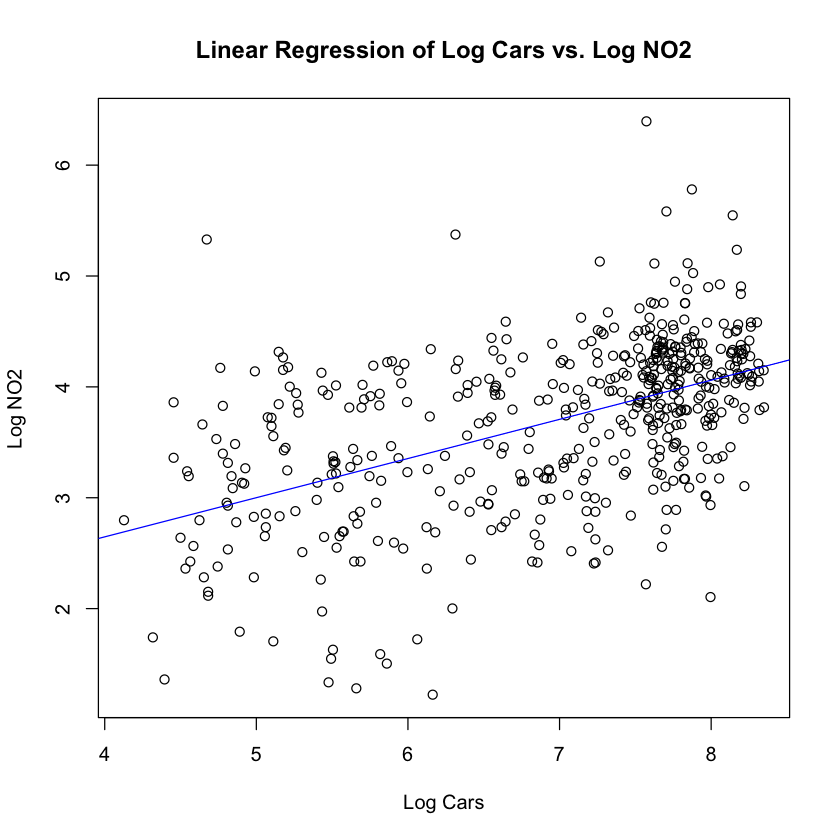

In [13]:
model = lm(log.no2~log.cars, data = no2data)
summary(model)
plot(x = no2data[,"log.cars"],
     y = no2data[,"log.no2"],
     xlab = "Log Cars",
     ylab = "Log NO2",
     main = "Linear Regression of Log Cars vs. Log NO2")
abline(model, col = 'blue')

By judging visually, our linear fit appears to be a reasonable representation of the relationship between the data. Our fit summary tells us the model is:

$$log_{10}(NO2) = 0.35353 \times log_{10}(cars) + 1.233$$

this tells us that with no cars on the road the $log_{10}(NO2)$ concentration should be 1.233 and that the concentration should increase by 0.35353 for every additonal logrithmic car per hour. Given that the p-value for the $\beta_{cars}$ is nearly zero, we reject that $\beta_{cars} = 0$ and assume it takes on a value other than zero and is therefore important for our model. Our adjusted $R^2$-score of 0.2607 is rather low and suggests that the model poorly explains the variance of NO2 concentrations.

##### Part C
We will now explore some of the residual plots of the data

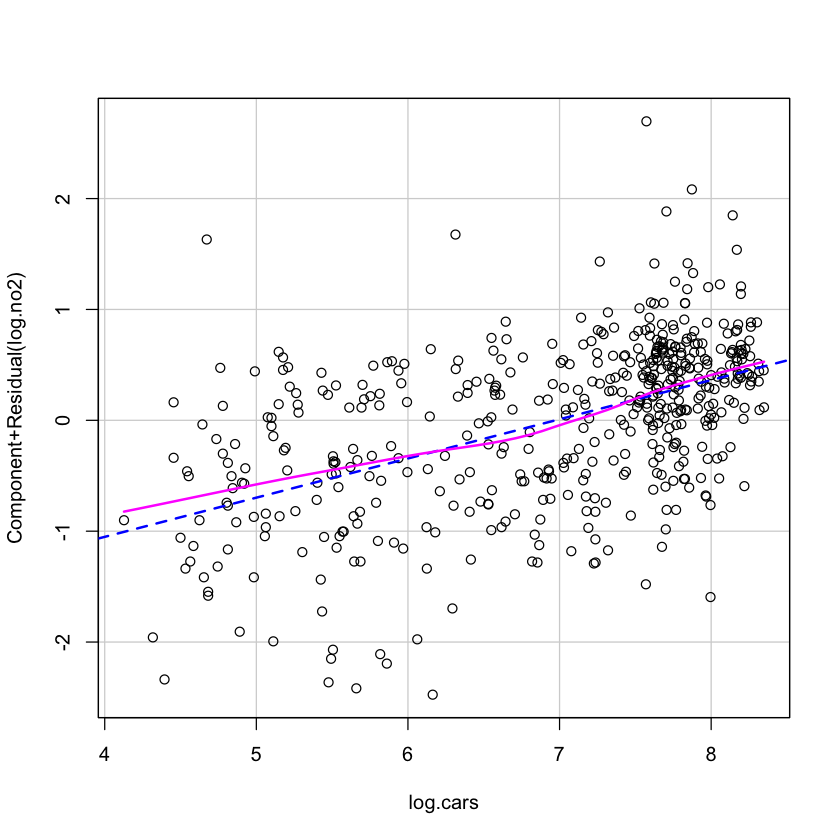

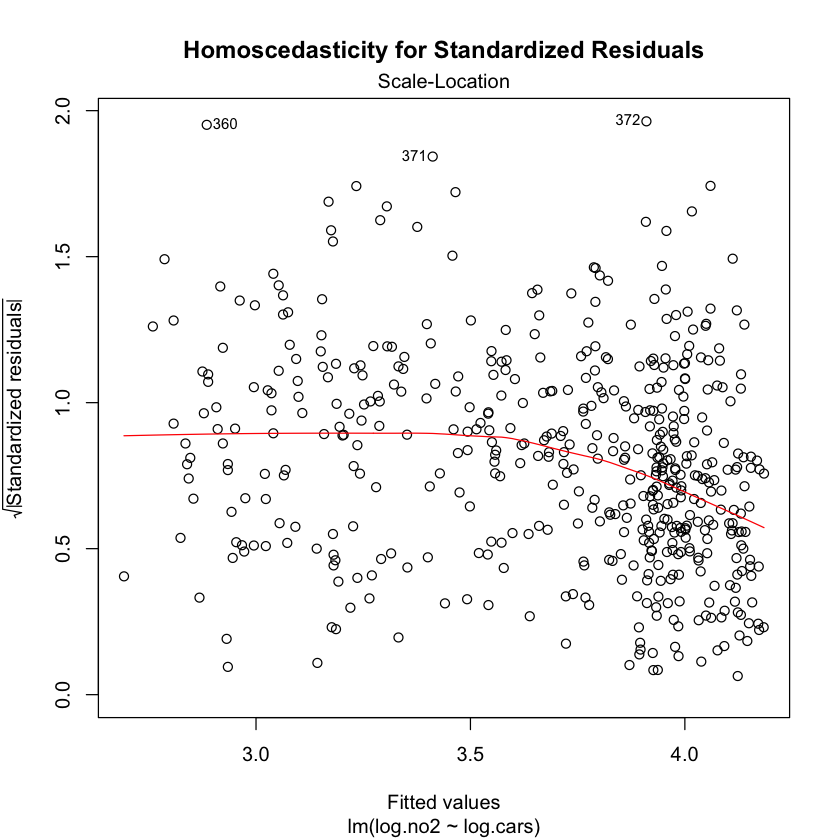

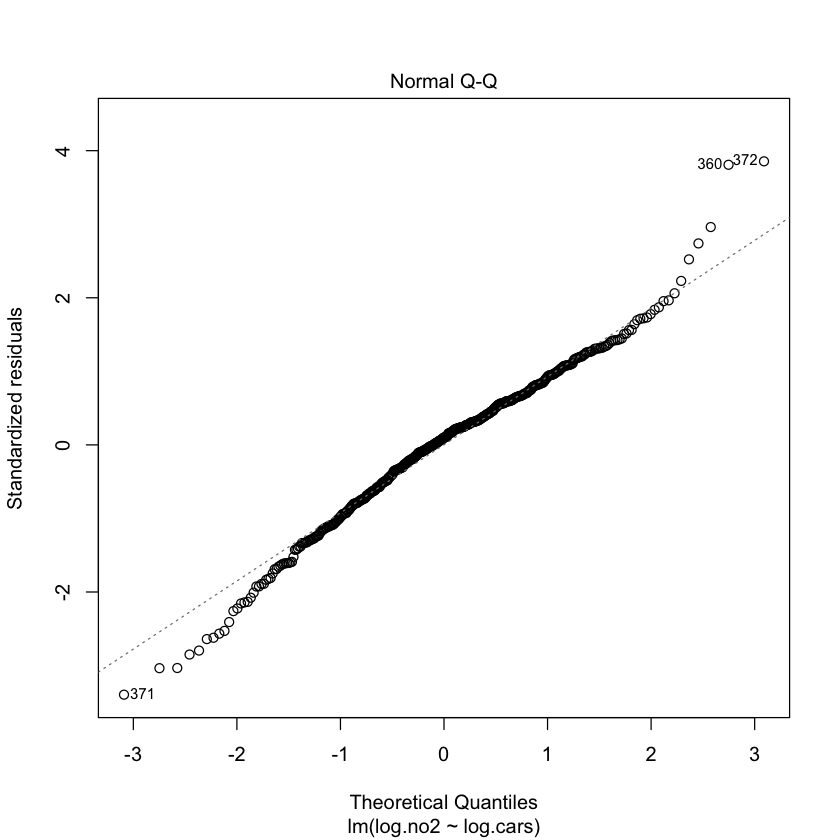

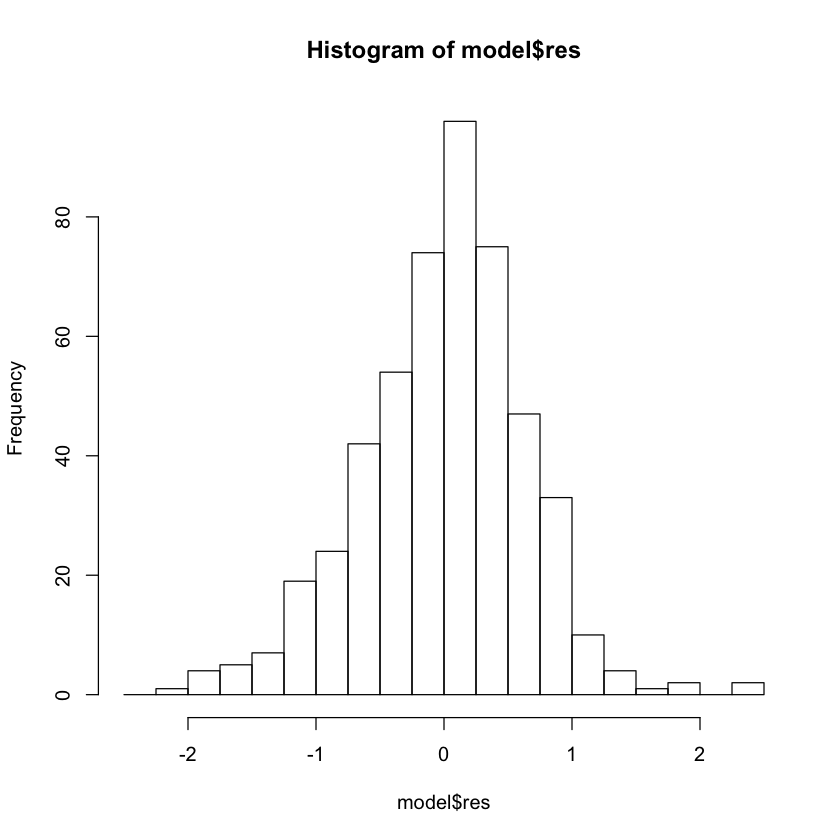

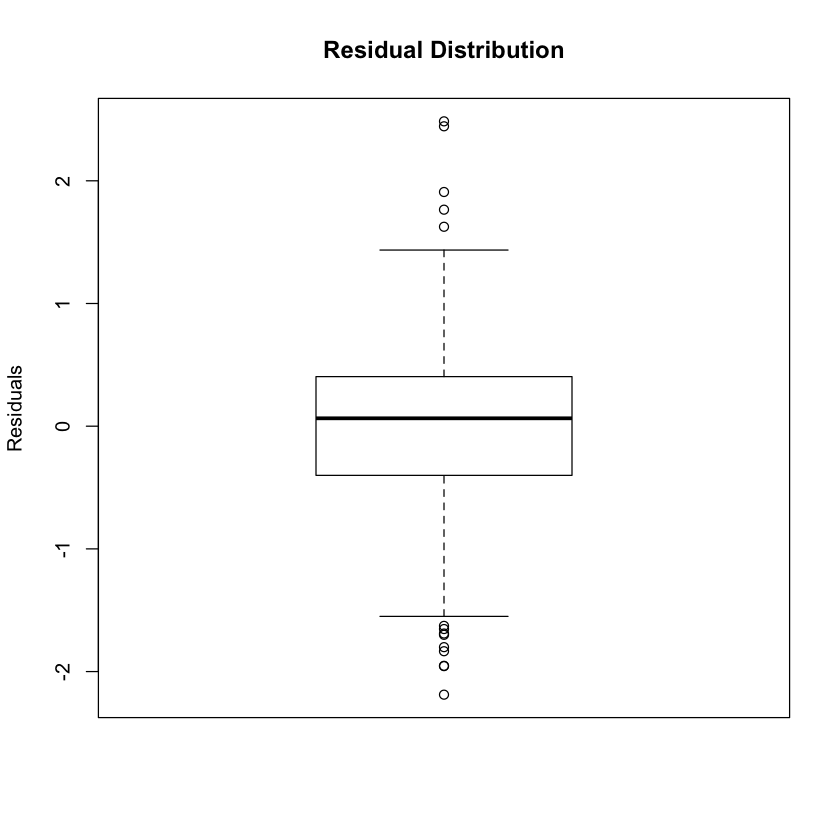

In [119]:
library(car)
crPlots(model, terms=~log.cars)
title = "Component Plus Residuals Plot"

plot(model, 3, main = "Homoscedasticity for Standardized Residuals")

plot(model, 2)

bins = seq(-2.5,2.5, length.out=21)
hist(model$res, breaks = bins)

boxplot(model$res, ylab = "Residuals", main = "Residual Distribution")

To check linearity, we create a Component Plus Residuals plot by plotting $\beta_j x_{ji} + r_i$ versus $x_{ji}$. We see that this plot is nearly linear with gradual deviation as $x_{ji}$ gets smaller but the deviaton is not large. This makes sense as we above noted that low values of $log_{10}(cars)$ appeared to coincide with a high spread in $log_{10}(NO2)$ values. We then check to see that the residuals are normally distributed independent of the predicted value $y_i$ (in our case NO2) by plotting the square root of the standardized residuals versus $y_i$. We see that for lower values of NO2, the residuals are greater than for higher values of NO2. This suggest the model more correctly predicts behavior for higher $log_{10}(cars)$ values. The boxplot and histogram of the residuals indicate that they are not quite normally distributed ($\mu = 0$ and $\sigma = 1$) and are skewed slightly towards postive values. The Q-Q plot further confirms the residuals are not normally distributed as the tails diverge noticably for the dahsed line.

##### Part D
Here we will add parameters to the model and transform variables in an attempt to obtain the best possible model.

Cross-Validated R2 0.4543194 



Call:
lm(formula = log.no2 ~ log.cars + wind.speed + temp + hour.of.day, 
    data = no2data, x = T, y = T)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24876 -0.32070  0.03084  0.33860  1.96057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.152131   0.175045   6.582 1.19e-10 ***
log.cars     0.456974   0.028411  16.084  < 2e-16 ***
wind.speed  -0.149334   0.014076 -10.609  < 2e-16 ***
temp        -0.026855   0.003905  -6.877 1.85e-11 ***
hour.of.day -0.013025   0.004452  -2.926   0.0036 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5508 on 495 degrees of freedom
Multiple R-squared:  0.4658,	Adjusted R-squared:  0.4615 
F-statistic: 107.9 on 4 and 495 DF,  p-value: < 2.2e-16


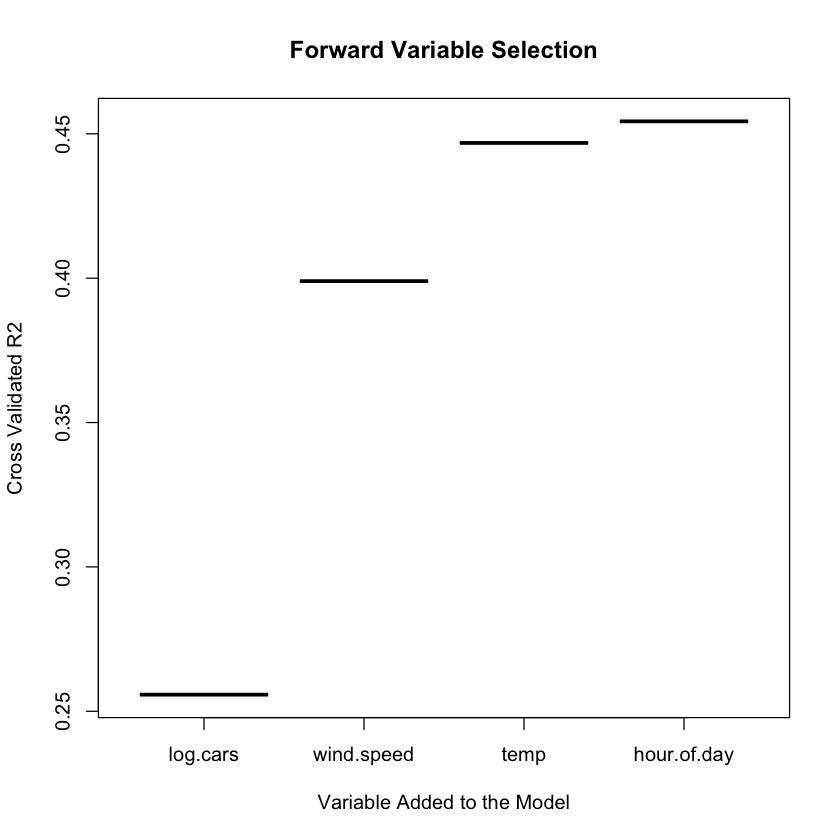

In [126]:
# A function that computes cross-validated R-squared.
cv.R2.func = function(lm.obj) {
  
  # Safety check
  if (("x" %in% names(lm.obj)) == FALSE) {stop("The given 'lm.obj' doesn't contain attribute 'x'.")}
  if (("y" %in% names(lm.obj)) == FALSE) {stop("The given 'lm.obj' doesn't contain attribute 'y'.")}
    
  # Extract 'x' and 'y' from the given 'lm.obj'.
  x = lm.obj$x
  y = lm.obj$y
  
  # Compute cross-validated R-squared.
  a = t(x)%*%x
  d = diag(1/eigen(a)$values)
  e = eigen(a)$vector
  inv.a = e%*%d%*%t(e)
  v = diag(x%*%inv.a%*%t(x))
  SSkryss = sum((lm.obj$res/(1-v))^2)
  SStot = sum((y-mean(y))^2)
  cross.validated.R2 = 1 - SSkryss/SStot
  
  # Return the cross validated R-squared.
  return(cross.validated.R2)
}

#Forward selection
model_1 = lm(log.no2~log.cars, data = no2data, x=T, y=T)
model_2 = lm(log.no2~log.cars+wind.speed, data = no2data, x=T, y=T)
model_3 = lm(log.no2~log.cars+wind.speed+temp, data = no2data, x=T, y=T)
model_4 = lm(log.no2~log.cars+wind.speed+temp+hour.of.day, data = no2data, x=T, y=T)
r2_1 = cv.R2.func(model_1)
r2_2 = cv.R2.func(model_2)
r2_3 = cv.R2.func(model_3)
r2_4 = cv.R2.func(model_4)

variables = c("log.cars","wind.speed","temp","hour.of.day")
var_vec = factor(variables,levels=variables)
r2_vec = c(r2_1, r2_2, r2_3, r2_4)
cat("Cross-Validated R2", r2_4, "\n")
summary(model_4)
plot(var_vec, r2_vec, xlab="Variable Added to the Model", ylab="Cross Validated R2", main="Forward Variable Selection")

Here we incrementally add parameters to the model and check the models Cross-Validated $R^2$ score each time. We see from the plot that by adding parameters we get increases in the Cross-Validated $R^2$ score. Additionally, the P-values for the $\beta_j$'s are less than 0.01 implying they are significant. For this multiple regression model or best Cross-Validated $R^2$ score is 0.4543. To see if we can improve this, we will transform the wind.speed variable by applying the $log_{10}$ function.


Cross-Validated R2 0.4721827


Call:
lm(formula = log.no2 ~ log.cars + log(wind.speed) + temp + hour.of.day, 
    data = no2data, x = T, y = T)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18068 -0.31840  0.03765  0.33429  1.81757 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.070868   0.170984   6.263 8.21e-10 ***
log.cars         0.457188   0.027931  16.369  < 2e-16 ***
log(wind.speed) -0.419388   0.036362 -11.534  < 2e-16 ***
temp            -0.026724   0.003837  -6.964 1.06e-11 ***
hour.of.day     -0.012297   0.004374  -2.811  0.00513 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5417 on 495 degrees of freedom
Multiple R-squared:  0.4833,	Adjusted R-squared:  0.4791 
F-statistic: 115.7 on 4 and 495 DF,  p-value: < 2.2e-16


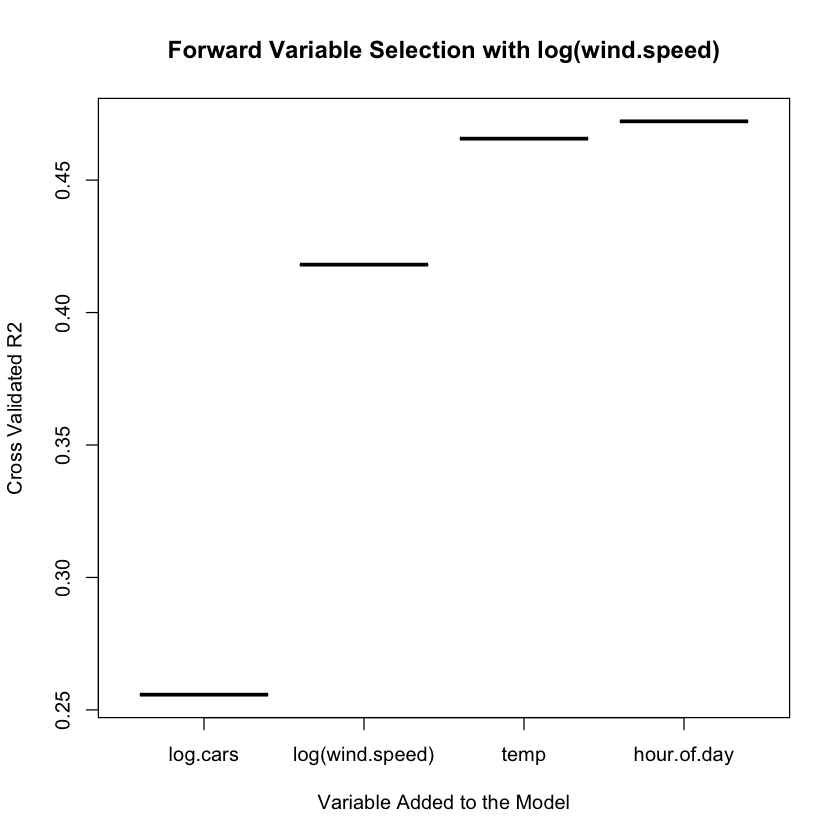

In [125]:
#Forward selection with log(wind.speed)
model_5 = lm(log.no2~log.cars, data = no2data, x=T, y=T)
model_6 = lm(log.no2~log.cars+log(wind.speed), data = no2data, x=T, y=T)
model_7 = lm(log.no2~log.cars+log(wind.speed)+temp, data = no2data, x=T, y=T)
model_8 = lm(log.no2~log.cars+log(wind.speed)+temp+hour.of.day, data = no2data, x=T, y=T)
r2_5 = cv.R2.func(model_5)
r2_6 = cv.R2.func(model_6)
r2_7 = cv.R2.func(model_7)
r2_8 = cv.R2.func(model_8)

variables = c("log.cars","log(wind.speed)","temp","hour.of.day")
var_vec = factor(variables,levels=variables)
r2_vec = c(r2_5, r2_6, r2_7, r2_8)
cat("\nCross-Validated R2", r2_8)
summary(model_8)
plot(var_vec, r2_vec, xlab="Variable Added to the Model", ylab="Cross Validated R2", main="Forward Variable Selection with log(wind.speed)")

By taking the logatrithm of the wind.speed variable we have improved the Cross-Validated $R^2$ score from 0.4543 to 0.4722.

##### Part E
We will now explore the parameters of or most efficient model.

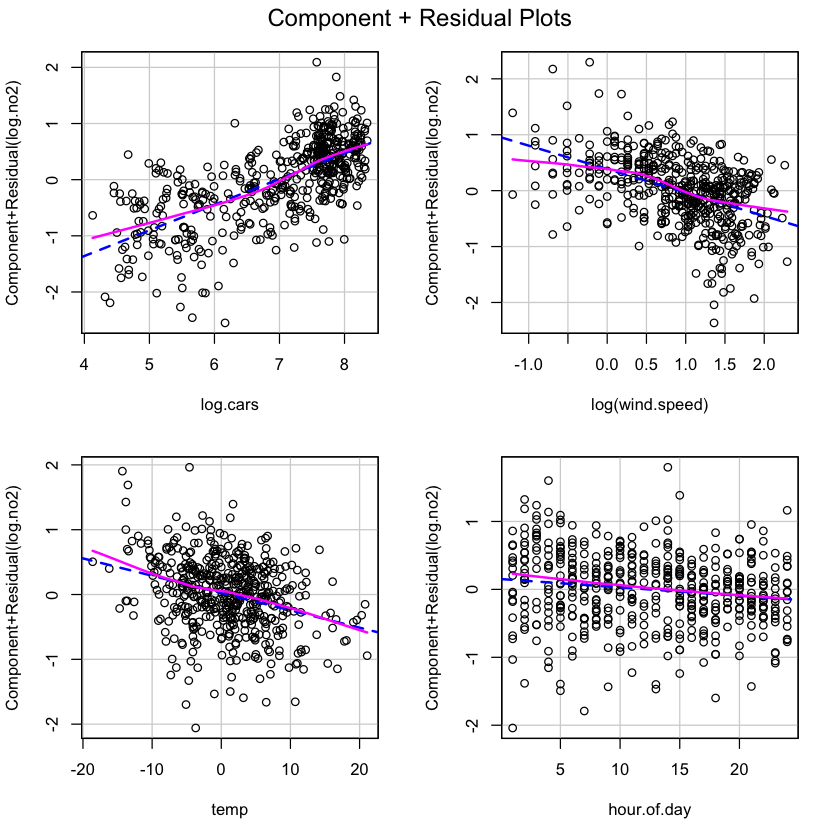

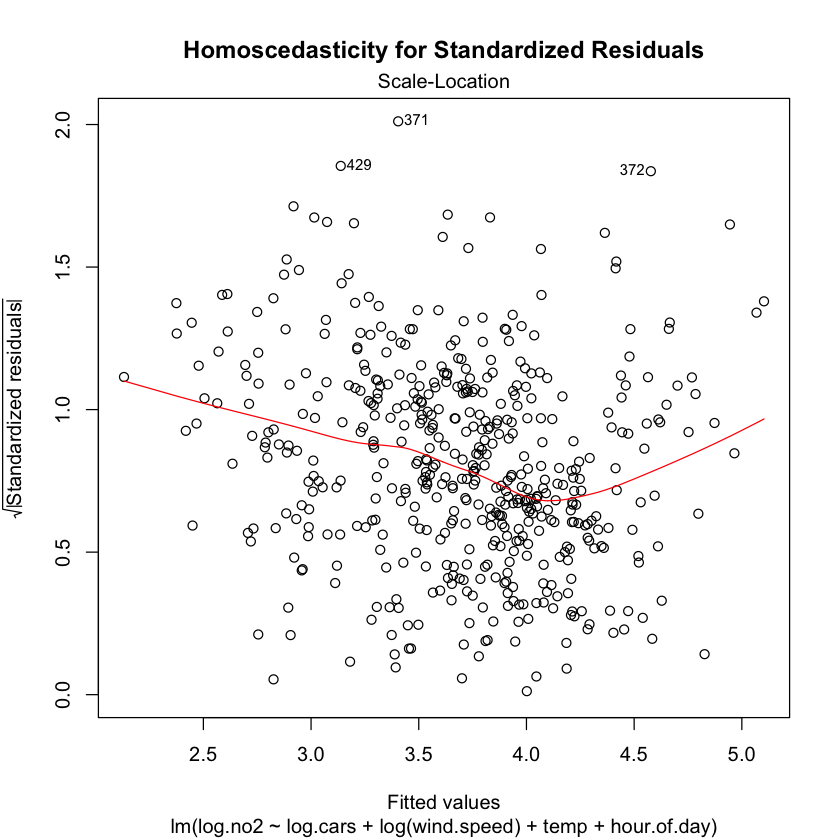

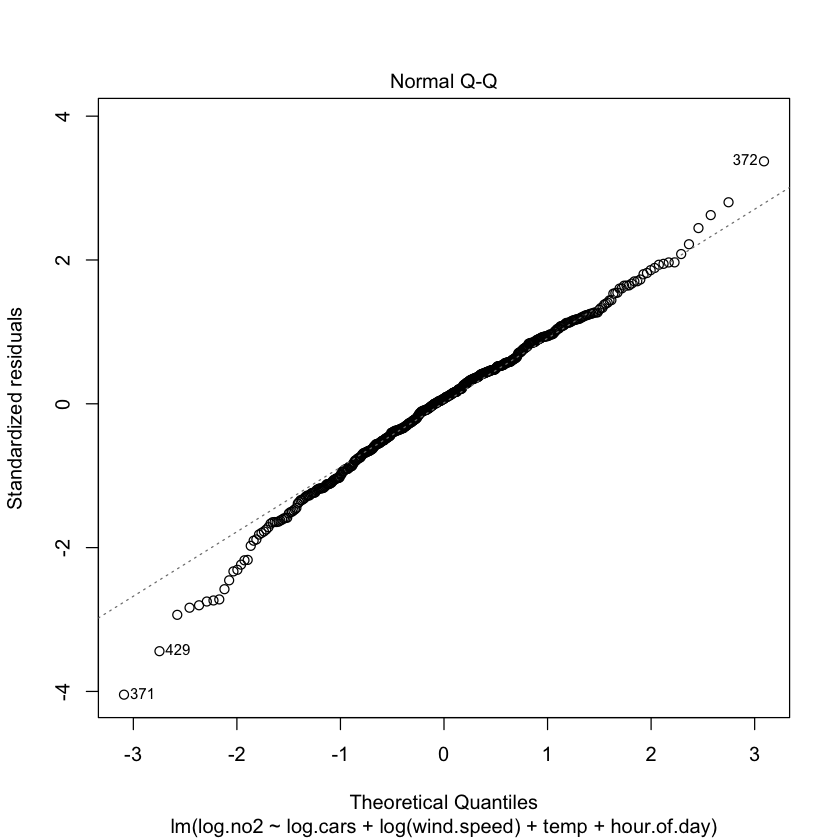

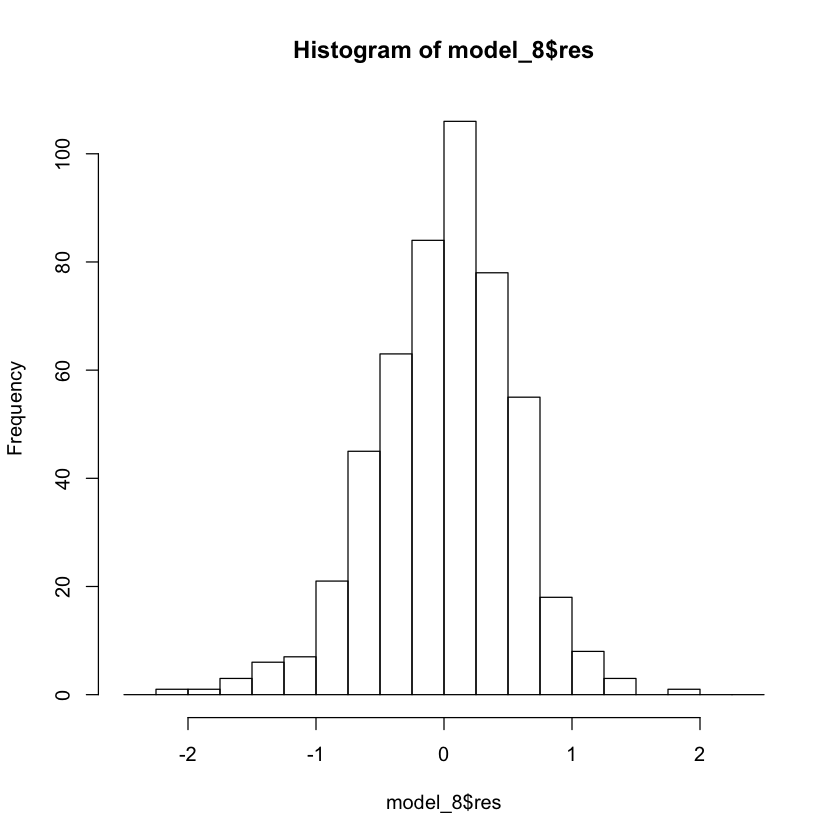

In [62]:
library(car)
crPlots(model_8, terms=~log.cars + log(wind.speed) + temp + hour.of.day)
plot(model_8, 3, main = "Homoscedasticity for Standardized Residuals")
plot(model_8, 2)
bins = seq(-2.5,2.5, length.out=21)
hist(model_8$res, breaks=bins)

The CPR plots of the parameters show general linearity among all of them, with the greatest exception being $log_{10}(wind.speed)$. Our Homoscedasticity plot tells us that for mid range values of $log_{10}(NO2)$ the residuals are smaller than for higher or lower values. Again, the Q-Q plot and residual histrogram show that our residuals are not quite normally distributed and are skewed slightly positive. 

Our final model is thus

$$ log_{10}(NO2) = 0.4572 \times log_{10}(cars) -0.4194 \times log_{10}(wind.speed) -0.0267 \times temp -0.0123 \times hour.of.day + 1.0709$$

meaning that holding all other parameters constant: an increase of 1 logrithmic car will add 0.4572 to the concentration, 1 logrithmic $m/s$ of wind.speed will decrease the concentration by 0.4194, 1 elapsed hour will decrease the concentration by 0.0123, and a 1 degree C temperature increase will decrease the concentration by 0.0267.

By adding and transforming parameters we have increased our $R^2$ score from 0.2607 to 0.4722. This is still somewhat low indicating that there are explanatory parameters that we have not considered.

#### Question 2
##### Part A

In [129]:
#reading data
setwd("/Users/douglas/2019_spring/STK4900/mando1")
blood = read.table("blood.txt",sep=" ",header=TRUE)

    Bloodpr           age   
 Min.   :104.0   Min.   :1  
 1st Qu.:112.0   1st Qu.:1  
 Median :117.0   Median :1  
 Mean   :122.2   Mean   :1  
 3rd Qu.:129.0   3rd Qu.:1  
 Max.   :160.0   Max.   :1  

    Bloodpr           age   
 Min.   :108.0   Min.   :2  
 1st Qu.:121.5   1st Qu.:2  
 Median :137.0   Median :2  
 Mean   :139.1   Mean   :2  
 3rd Qu.:157.8   3rd Qu.:2  
 Max.   :174.0   Max.   :2  

    Bloodpr           age   
 Min.   :110.0   Min.   :3  
 1st Qu.:138.0   1st Qu.:3  
 Median :148.0   Median :3  
 Mean   :155.2   Mean   :3  
 3rd Qu.:164.0   3rd Qu.:3  
 Max.   :214.0   Max.   :3  

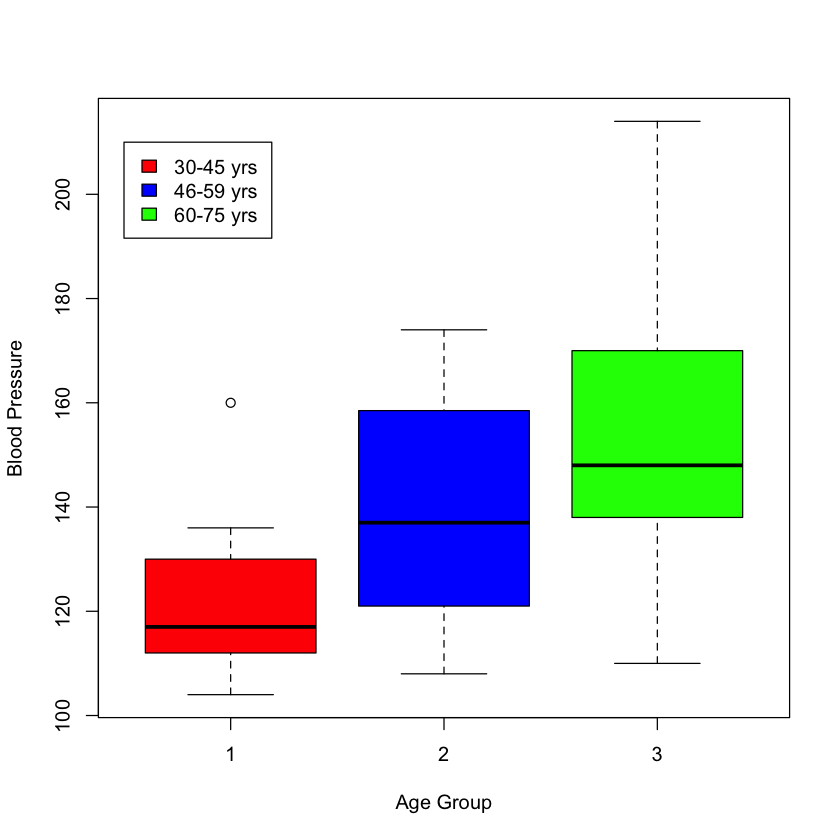

In [85]:
summary(subset(blood,age==1))
summary(subset(blood,age==2))
summary(subset(blood,age==3))
boxplot(Bloodpr~age, data=blood, ylab = "Blood Pressure", xlab = "Age Group", col = c("red", "blue", "green"))
legend(.5, 210, legend = c("30-45 yrs", "46-59 yrs", "60-75 yrs"), fill = c("red", "blue", "green"))

The summaries show that each succesive older age group has a higher mean and median blood pressure. The box plots also show what appears to be an increase in blood pressure with age. It should be noted that the values for the middle age group rather spread out and overlap the two other groups.

##### Part b

In [133]:
blood$age = factor(blood$age)
blood_anova = aov(Bloodpr~age, data = blood)
cat("Anova summary")
summary(blood_anova)


Anova summary

            Df Sum Sq Mean Sq F value  Pr(>F)   
age          2   6535    3268   6.469 0.00426 **
Residuals   33  16670     505                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Here we are testing the null hypothesis that $\mu_1 = \mu_2 = \mu_3$ for the corresponding groups with the alternative hypothesis that the $\mu$'s are not all equal. The resulting small P-value of 0.004 < 0.05 indicates that we can reject the hypothesis and that the mean blood pressures for each group are not equal to eachother. For this to hold we have to assume that we have independent and normally distributed observations.

##### Part C
We will now perform a regression analysis on the data with the age groups defined as categorical variables. We will use treatment contrast with the youngest group as a reference thus our $\beta$'s in our model are $\mu_2 - \mu_1$ for group 2 and $\mu_3 - \mu_1$ for group 3.

In [134]:
cat("Model summary")
blood_model = lm(Bloodpr~age, data = blood)
summary(blood_model)

Model summary


Call:
lm(formula = Bloodpr ~ age, data = blood)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.167 -15.583  -5.167  14.104  58.833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  122.167      6.488  18.829  < 2e-16 ***
age2          16.917      9.176   1.844  0.07423 .  
age3          33.000      9.176   3.596  0.00104 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.48 on 33 degrees of freedom
Multiple R-squared:  0.2816,	Adjusted R-squared:  0.2381 
F-statistic: 6.469 on 2 and 33 DF,  p-value: 0.004263


From our model, the mean blood pressure for group 1, $\mu_1 = 122.17$, is the intercept of the model. the $\beta$'s for groups 2 and 3 tell us that by increasing age from group 1 to 2 and 1 to 3, we get a blood pressure increase of 16.92 and 33.00 respectively. However, our P-values tell us that while the increase from group 1 to 3 is significant (P = 0.001), the increase from group 1 to 2 is not (P = .074 > .05). This could mean that age does not play a significant role in blood pressure until the older ages represented in group 3. The $R^2$ score is also rather low (0.2381) indicating that blood pressure is not explained by age alone.

In [ ]:
END